In [238]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

In [239]:


# Synthetic dataset creation
X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)














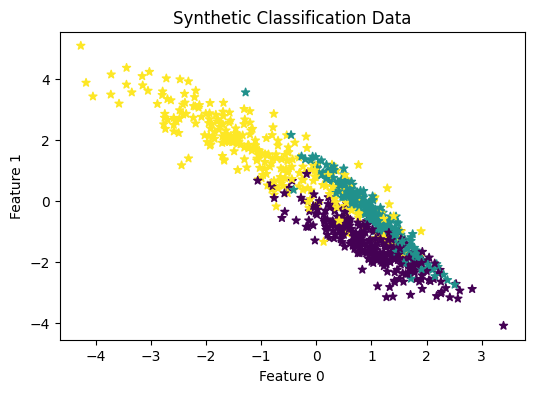

In [240]:

# Visualize the synthetic dataset
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*")
plt.title("Synthetic Classification Data")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [241]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)



In [242]:
# Train GaussianNB on synthetic data
model = GaussianNB()
model.fit(X_train, y_train)




GaussianNB()

In [243]:
# Single prediction
predicted = model.predict([X_test[6]])
print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])



Actual Value: 0
Predicted Value: 0


In [244]:
# Evaluation on synthetic test data
y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Synthetic Dataset Evaluation")
print("Accuracy:", accuray)
print("F1 Score:", f1)



Synthetic Dataset Evaluation
Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


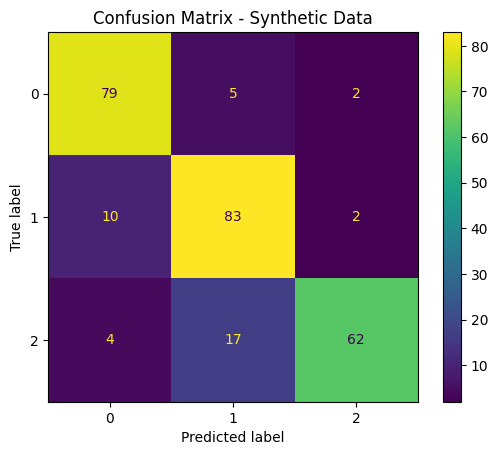

In [245]:
# Confusion matrix for synthetic data
labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title("Confusion Matrix - Synthetic Data")
plt.show()


In [246]:
# Load loan dataset
df = pd.read_csv('loan_data.csv')
print("Loan Dataset Loaded")
print(df.head())


Loan Dataset Loaded
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                        

In [247]:

# Explore the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

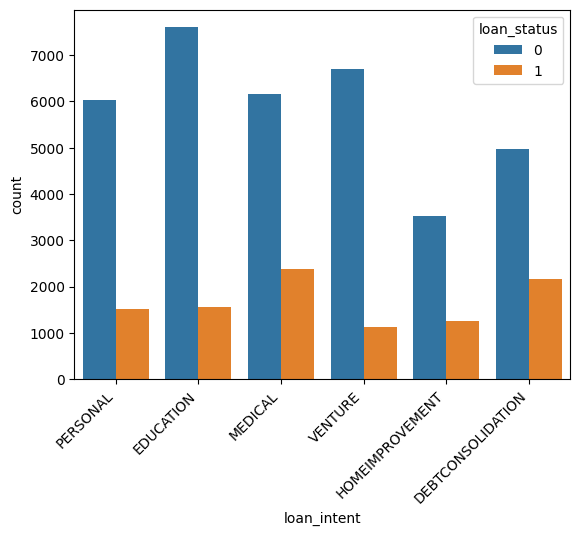

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='loan_intent', hue='loan_status')
plt.xticks(rotation=45, ha='right')
plt.show()

In [249]:
# Convert categorical column
pre_df = pd.get_dummies(df, columns=['loan_intent'], drop_first=True)
print(pre_df.head())



   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt  loan_int_rate  loan_percent_income  \
0                  RENT    35000.0          16.02                 0.49   
1                   OWN     1000.0          11.14                 0.08   
2              MORTGAGE     5500.0          12.87                 0.44   
3                  RENT    35000.0          15.23                 0.44   
4                  RENT    35000.0          14.27                 0.53   

   cb_person_cred_hist_length  credit_score previous_loan_defaults_on_file  \
0 

In [250]:
# Define features and target
X = pre_df.drop('loan_status', axis=1)
y = pre_df['loan_status']


In [251]:
print(X_encoded.shape)  # This will print the shape of X_encoded (should be (30150, features_count))
print(y.shape)  # This will print the shape of y (should match X_encoded rows)
y = y[:len(X_encoded)]  # Ensure y has the same number of rows as X_encoded
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.33, random_state=125
)


(30150, 22)
(45000,)


In [252]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Example: Encode categorical columns in X
X_encoded = X_train.copy()

# Encode all object or category type columns
for col in X_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Now train
model = GaussianNB()
model.fit(X_encoded, y_train)

GaussianNB()

In [253]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7820100502512563
F1 Score: 0.877671874118775


In [254]:
X_encoded = pd.get_dummies(pre_df.drop('loan_status', axis=1), drop_first=True)
y = pre_df['loan_status']